# Handling Missing data

# Missing Data

In machine learning, the quality and completeness of data are often just as important as the algorithms and models we choose. Though common in real-world datasets, missing data can introduce significant challenges to model training and prediction accuracy. When data points are incomplete, models can become biased, results may be inaccurate, and performance might degrade, leading to unreliable outcomes.



# Causes of Missing Data

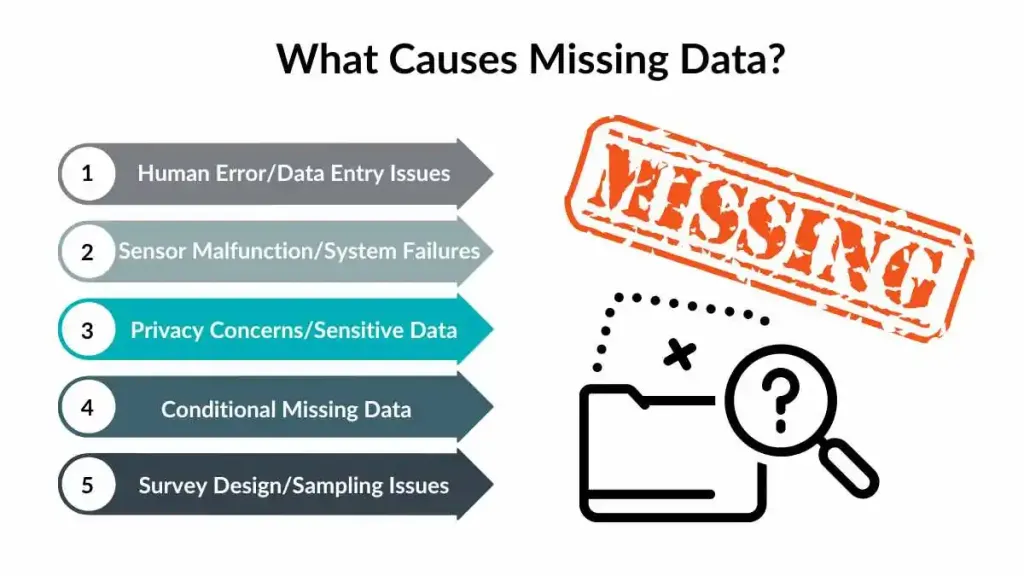

# Types of Missing Data

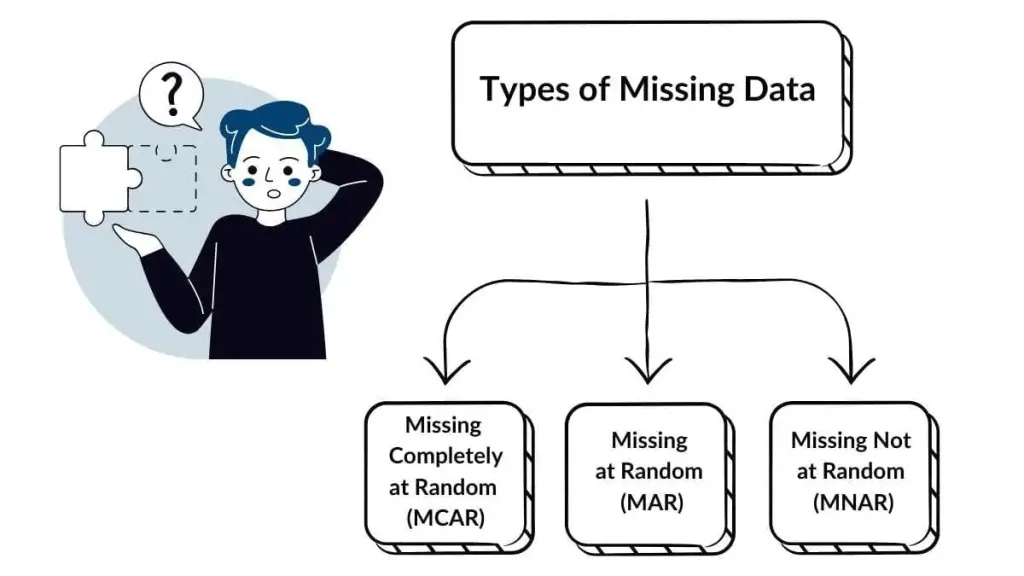

1.Missing Completely at Random (MCAR)
- the probability of missingness is independent of both observed and unobserved data. In other words, the missing values occur randomly, and there is no underlying pattern or reason behind them.
- the missing values are essentially random noise. As a result, dropping or imputing the missing data tends not to introduce significant bias in the model.

2.Missing at Random (MAR)
- the probability of missingness is related to the observed data but not the missing data itself. In this case, missing values are conditional on other known information
- the missingness can often be predicted using the other observed variables.
- Imputation methods, such as regression models or K-nearest neighbours (KNN), are usually helpful in filling in the gaps in this scenario.

3.Missing Not at Random (MNAR)
- when the data’s missingness is related to its value
- Since the missing data is systematically related to the missing values, ignoring or simply imputing it can introduce significant bias. Special strategies, like model-based methods or domain knowledge, are often needed to handle MNAR effectively.

# Impact of not handling missing data

- Biased Results and Loss of Accuracy
- Difficulty in Model Convergence
- Risk of Discarding Valuable Information
- Distortion of Data Distributions
- Increased Model Complexity
- Impact on Real-world Applications

# Techniques for Handling Missing Data

## Remove or Drop Missing Data

**Row-wise deletion**: Remove rows with missing values.

**Column-wise deletion**: Remove columns with a significant amount of missing values.

If the percentage of missing data is small and the missingness is random, dropping rows or columns may be an acceptable solution.

**Pros**:

- Simple and easy to implement.
- Maintains the integrity of the remaining data.

**Cons**:

- This can result in a significant loss of information, especially if missing data is widespread.
- Risk of bias if missing data is not completely random (MCAR).


## Mean/Median/Mode Imputation

**Mean/median imputation:** For numerical data, replace missing values with the mean or median of the observed data in the same column.

**Mode imputation:** Replace missing values with the most frequent (mode) value for categorical data.

When the amount of missing data is small, and there are no strong relationships between the missing data and other variables.

**Pros**:

-Simple and quick to implement.
- Maintains dataset size.

**Cons**:

- It can distort the data distribution, especially if missing values are widespread.
- Ignores relationships between variables, potentially introducing bias.


## K-Nearest Neighbors (KNN) Imputation

The KNN algorithm identifies the “K” nearest neighbours for each missing value based on the other variables. The missing value is credited based on its neighbours’ average (or majority class).

When the missingness is related to other variables in the dataset, and you have enough data to make meaningful neighbour comparisons.

**Pros**:

- Utilizes information from the entire dataset, preserving relationships between variables.
- It is more flexible and accurate than mean/median imputation.

**Cons**:

- It is computationally expensive, especially with large datasets.
- Sensitive to outliers and the choice of “K.”


## Multiple Imputation

This approach generates several plausible datasets by filling in missing data multiple times using various predictions. The final model is based on the aggregate of these datasets, accounting for the uncertainty of missing values.

When you want to reflect the uncertainty of missing data and avoid the bias introduced by a single imputation.

**Pros**:

- Provides a more robust estimation of missing data.
- Accounts for the uncertainty associated with imputations.

**Cons**:

- Complex and computationally intensive.
- Requires expertise to implement effectively.


## Predictive Models for Imputation

Build a machine learning model (e.g., linear regression, decision trees) to predict missing values based on other features in the dataset.

When the missingness is related to other variables, and there is enough data to train a predictive model.

**Pros**:

- Produces more accurate imputations by leveraging the predictive power of machine learning models.
- Maintains the integrity of relationships between variables.

**Cons**:

- It can introduce bias if the model overfits or the missing data is not random (MNAR).
- Requires additional computational resources.


## Forward/Backward Filling (Time-Series Specific)


In time-series data, missing values are replaced with the previous (forward fill) or next (backward fill) valid value.

When the data is sequential, missing values can reasonably be assumed to follow the trend of adjacent values.

**Pros**:

- Simple and effective for certain types of time-series data.
- Preserves the chronological structure of the data.

**Cons**:

- It can introduce bias, particularly in volatile or non-stationary time-series data.
- Not suitable for data that shows sudden jumps or shifts in values.


## Use Algorithms that Handle Missing Data Natively

Some machine learning algorithms (e.g., decision trees, XGBoost, LightGBM) can handle missing data by treating missing values as a separate category or splitting data based on available variables.

Using algorithms that can naturally work with missing data without requiring explicit imputation.

**Pros**:

- Eliminates the need to preprocess the missing data.
- Can handle large datasets efficiently.

**Cons**:

- It is limited to specific algorithms that natively support missing data.
- It may not perform as well with highly structured or complex missingness patterns.

## Assign Indicator for Missingness

Create an additional binary feature that indicates whether a value is missing. The missing value is then either imputed or left as is, but the new feature suggests the presence of missingness, allowing the model to learn from this pattern.

When missing data might carry important information (e.g., a missing value could be predictive of the target variable).

**Pros**:

- Allows the model to capture relationships between missing data and the target variable.
- It is easy to implement and adds minimal complexity.

**Cons**:

- It may introduce noise if missingness is not related to the target.
- It does not impute the actual missing value, so additional steps may still be needed.

# Implementation

In [ ]:
install pandas scikit-learn fancyimpute

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

In [ ]:
# Sample DataFrame
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 1, 2, 3, 4],
    'C': [1, 2, 3, np.nan, 5],
    'D': [1, np.nan, np.nan, 4, 5]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

In [ ]:
# Drop rows with any missing values
df_dropped = df.dropna()
print("\nDataFrame after dropping rows with missing values:")
print(df_dropped)

# Drop columns with any missing values
df_dropped_columns = df.dropna(axis=1)
print("\nDataFrame after dropping columns with missing values:")
print(df_dropped_columns)

In [ ]:
# Mean imputation
mean_imputer = SimpleImputer(strategy='mean')
df[['A', 'B', 'C']] = mean_imputer.fit_transform(df[['A', 'B', 'C']])
print("\nDataFrame after mean imputation:")
print(df)

In [ ]:
# KNN imputation
knn_imputer = KNNImputer(n_neighbors=2)
df_knn = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
print("\nDataFrame after KNN imputation:")
print(df_knn)

In [ ]:
# Iterative imputation
iterative_imputer = IterativeImputer()
df_iterative = pd.DataFrame(iterative_imputer.fit_transform(df), columns=df.columns)
print("\nDataFrame after iterative imputation:")
print(df_iterative)

In [ ]:
# Add missingness indicators
for column in df.columns:
    df[f'{column}_missing'] = df[column].isnull().astype(int)

print("\nDataFrame with missingness indicators:")
print(df)

In [ ]:
pip install missingno

In [ ]:
import missingno as msno

# Visualize missing values
msno.matrix(df)

# Top 11 Tools and Libraries for Handling Missing Data


## Pandas (Python)

Key functions:

- isnull(): Detect missing values in a DataFrame or Series.
- notnull(): Detect non-missing values.
- dropna(): Remove rows or columns with missing values.
- fillna(): Impute missing values with a specified value (mean, median, or other).
- interpolate(): Fill missing values using interpolation methods, especially for time-series data.


## Scikit-learn (Python)


Key functions:

- SimpleImputer(): Fills missing values using predefined strategies such as the mean, median, or mode.
- KNNImputer(): Imputes missing values using the K-nearest neighbours algorithm.
- IterativeImputer(): An advanced imputation technique that models each feature with missing values as a function of the other features, iterating through the missing values multiple times.

## Keras and TensorFlow (Python)


Key functions:

- tf.keras.preprocessing.sequence.pad_sequences(): Handles missing data in sequential data, particularly for time-series and natural language processing tasks.
- Masking() layer: In neural network models, this layer identifies missing data points and excludes them from training without needing to fill in the gaps explicitly.


## MissForest (R and Python)


- R implementation: Available in the missForest R package.
- Python implementation: Available through the Missingpy package, which offers several imputation techniques for machine learning.

## MICE (Multiple Imputation by Chained Equations)


- R implementation: The mice package in R is a popular choice for multiple imputations.
- Python implementation: Scikit-learn’s IterativeImputer can perform similar multiple imputations using an iterative approach.

## H2O.ai (R, Python, and Web Interface)

H2O.ai is a machine learning platform offering a range of automated machine learning (AutoML) capabilities, including data preprocessing automatically handling missing data.

Key features:

- Automated handling of missing data with built-in imputation techniques.
- Native support for algorithms like Random Forests and Gradient Boosting Machines (GBMs), which can natively handle missing data without imputation.

## Amelia (R)

The Amelia package in R is designed for multiple imputations of missing data using a bootstrapping-based algorithm. It works well with time-series and cross-sectional data, making it a good fit for research and real-world applications.

Amelia is especially useful for handling missing data in datasets where the missingness pattern is structured across time, such as in longitudinal studies.

## RapidMiner

RapidMiner is a popular visual programming tool for data science and machine learning. It provides built-in tools for detecting and handling missing data, as well as preprocessing and model training capabilities.

Key features:

- Easy-to-use drag-and-drop interface for preprocessing tasks.
- Built-in functions for imputation using mean, median, mode, and advanced techniques like predictive imputation.


## IBM SPSS

SPSS (Statistical Package for the Social Sciences) is a popular tool for statistical analysis, and it includes robust methods for handling missing data, such as listwise deletion, pairwise deletion, and multiple imputation.

SPSS is widely used in research and offers powerful statistical tools for analyzing missing data, making it a good choice for academic or applied research settings.



# Source

- https://spotintelligence.com/2024/10/18/handling-missing-data-in-machine-learning/